<a href="https://colab.research.google.com/github/andresvc21/Random_Practice_ML/blob/main/Homework_M2_Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

# Explore Data


In [24]:
#Import Data and libraries
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from keras.datasets import fashion_mnist
import tensorflow as tf
import datetime
from tensorflow import keras


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Exploe data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


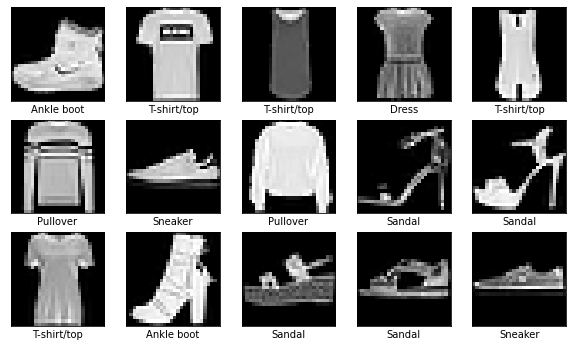

In [25]:
# From https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660 we know the data has next follow names

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

#Design Space


In [26]:
#Random values for 4 hyperparametrs
opt = ['Adam','SGD']
lr = [0.01, 0.05, 0.1, 0.2, 0.5]
batch = [8, 16, 32, 64, 128]
afs = ['sigmoid', 'relu', 'tanh', 'elu']

#Normalize


In [27]:
#Normalize 0-1

X_train=X_train/255.0
X_test=X_test/255.0

In [29]:
import tensorflow as tf
import datetime
from tensorflow import keras

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

#10 models

In [37]:
n = 10
historyList = []
model_number = []


for i in range(1,n+1):
  K.clear_session()

  optimizer = eval("%s(learning_rate=%s)" % (random.choice(opt), str(random.choice(lr))))
  activation_function = random.choice(afs)

  inputs = keras.Input(shape=(28,28,))
  x = Flatten()(inputs)
  y = keras.layers.Dense(10, activation=activation_function)(x)
  y = keras.layers.Dense(10, activation=activation_function)(y)
  x_1 = keras.layers.concatenate([y,x]) 
  outputs = keras.layers.Dense(10, activation='sigmoid')(x_1)

  model = keras.Model(inputs, outputs)

  model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                    optimizer=optimizer,
                    metrics=[keras.metrics.sparse_categorical_accuracy])
  
  model_number.append(i)

  h = model.fit(X_train, y_train, batch_size=random.choice(batch), epochs=5)
  historyList.append(pd.DataFrame(h.history, index=h.epoch))
  model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7643 - sparse_categorical_accuracy: 0.7739
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8412 - sparse_categorical_accuracy: 0.7998
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9567 - sparse_categorical_accuracy: 0.8008
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9094 - sparse_categorical_accuracy: 0.8087
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.4486 - sparse_categorical_accuracy: 0.7767
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 3.0224 - sparse_categorical_accuracy: 0.7665
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 2.4746 - sparse_categorical_accuracy: 0.7982
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 2.6636 - sparse_categorical_accuracy: 0.8016
Epoch 4/5
469/469 [=============================

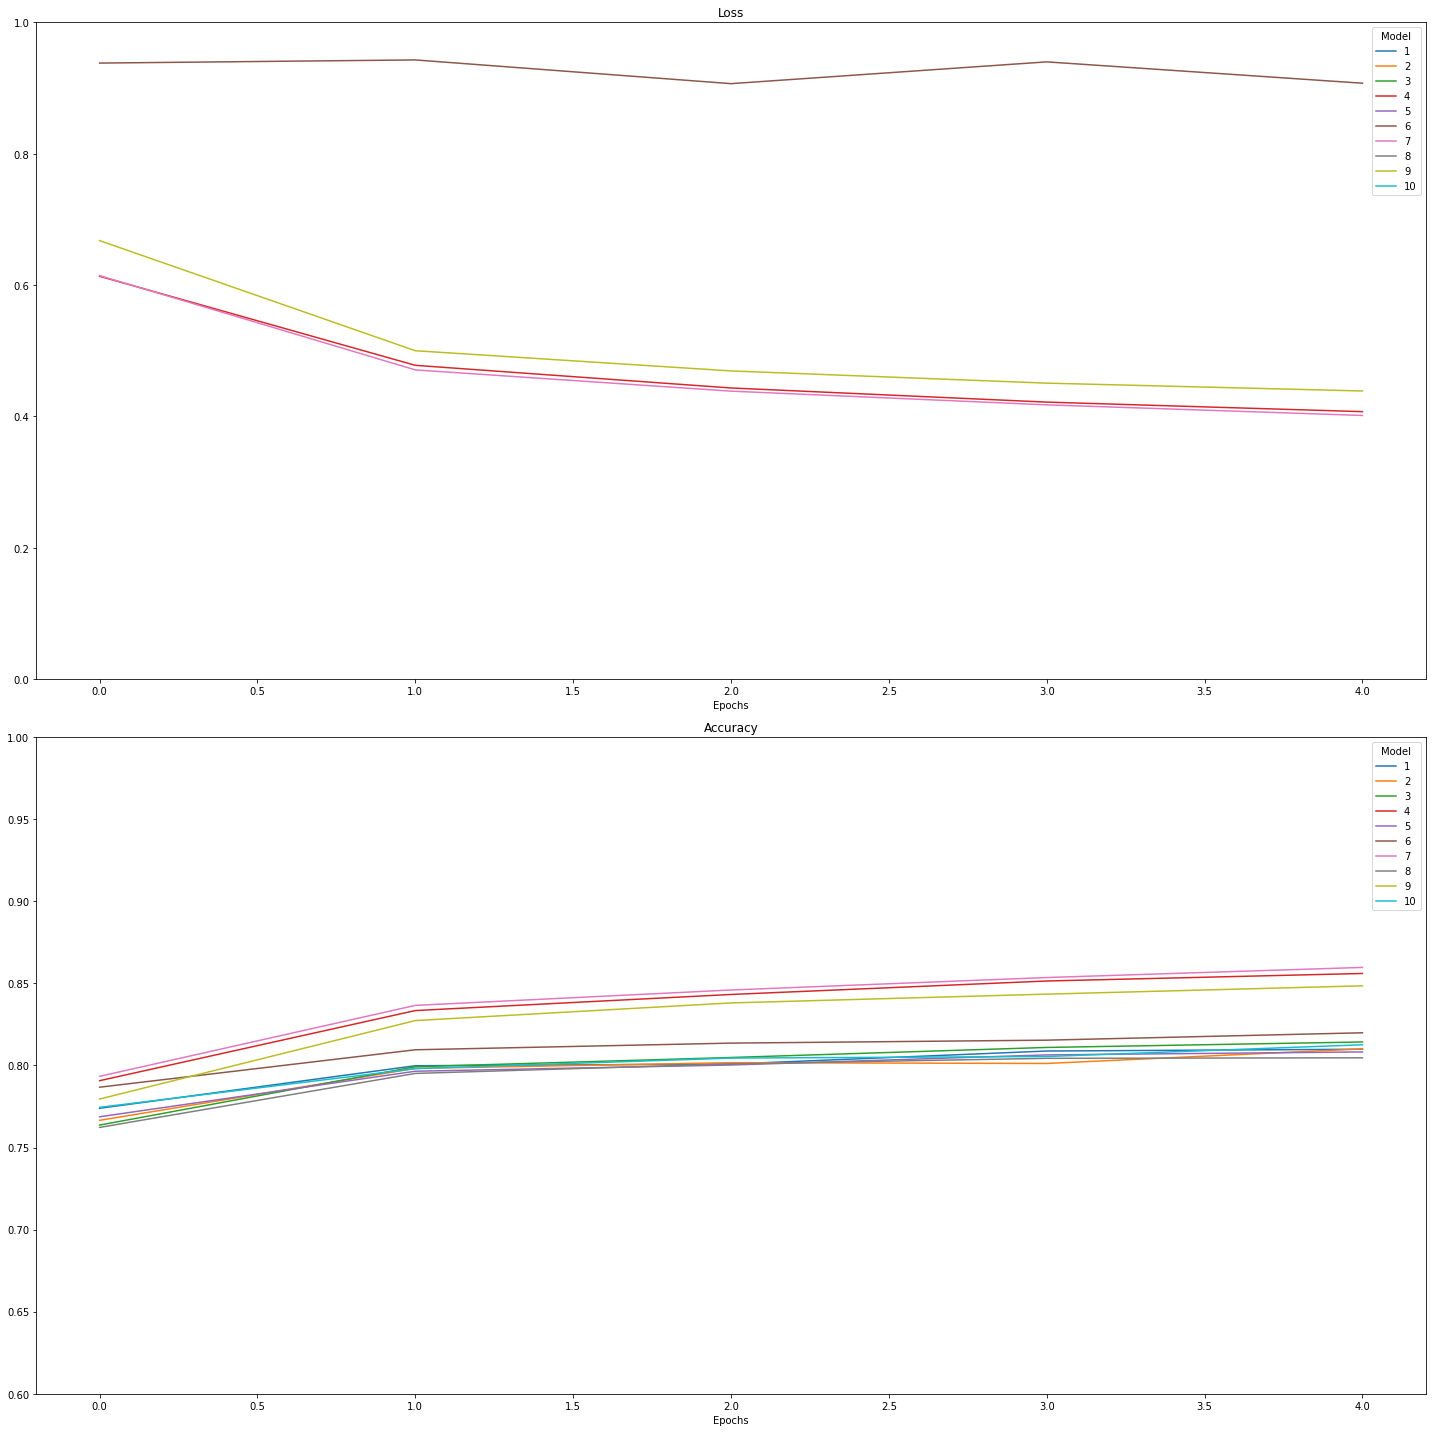

In [38]:
historydf = pd.concat(historyList, axis=1)
metrics_reported = historyList[0].columns
idx = pd.MultiIndex.from_product([model_number, metrics_reported],
                                 names=['Model', 'metric'])

historydf.columns = idx

# Plot
plt.figure(figsize=(20,20))

# Adding subplots
# Subplot that shows the loss of all ten models
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.xlabel("Epochs")

# Subplot that shows the accuracy of all ten models
ax = plt.subplot(212)
historydf.xs('sparse_categorical_accuracy', axis=1, level='metric').plot(ylim=(0.6,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()